In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandarallel import pandarallel
from sklearn.feature_extraction.text import TfidfVectorizer
from features import HTMLFeatures, URLFeatures
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


# **PHISHING DATASET ANALYSIS**

* * *

In [2]:
# importing datasets
texts = pd.read_csv('DATASETS/PRE/TEXTS.csv')
urls = pd.read_csv('DATASETS/PRE/URLS.csv')
webs = pd.read_csv('DATASETS/PRE/WEBS.csv')

### Classes Distribution

<Axes: ylabel='label'>

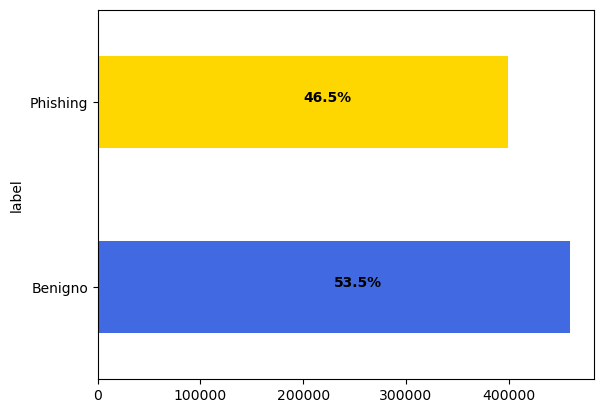

In [3]:
dist = pd.concat([texts['label'], urls['label'], webs['label']]).value_counts()
dist.index = dist.index.map({0: 'Benigno', 1: 'Phishing'})
plt.text(230010, 0, '53.5%', color='black', fontweight='bold')
plt.text(200000, 1, '46.5%', color='black', fontweight='bold')
dist.plot.barh(color=['royalblue', 'gold'])

## **URL Analysis**

A URL has lexical characteristics, which refer to the textual properties of the URL. According to some investigations, some URL features related to phishing attacks are:

- Presence of suffix or prefix "-" in the domain
- Points number
- Presence of the IP direction in the domain
- Presence of keywords such as 'login', 'server', and 'admin'
- Subdirectories number
- Host Length
- etc

In [4]:
# extract url relevant features
urls = pd.DataFrame([URLFeatures(row.text).get_features()|{'label': row.label} for row in urls.itertuples(index=False)])
urls = urls.astype(int)

In [5]:
# calculate averages of each feature by class
urls_features = pd.concat([
    urls.loc[urls['label'] == 0].mean(axis=0),
    urls.loc[urls['label'] == 1].mean(axis=0)
], axis=1).rename(columns={0: 'Benigno', 1:'Phishing'})[:-1]

In [6]:
# calculate proportions in bool url features
url_proportions = urls_features.copy()[:11] * 100
url_proportions['Diff'] = abs(url_proportions['Benigno'] - url_proportions['Phishing']).round(3)
url_proportions

,Benigno,Phishing,Diff
use_shortening_service,7.072162,5.166026,1.906
prefix_suffix_presence,0.626812,11.062183,10.435
has_double_slash,0.018980,0.631297,0.612
has_haveat_sign,0.056713,1.186786,1.130
has_port,0.017151,0.026390,0.009
has_admin_keyword,0.101534,1.906051,1.805
has_server_keyword,0.216560,0.485892,0.269
has_login_keyword,0.192320,9.076185,8.884
has_client_keyword,0.102677,0.527547,0.425
host_is_ip,0.000229,0.561181,0.561


In [7]:
# calculate averages in numeric url features
url_averages = urls_features.copy()[11:]
url_averages['Pct Change'] = ((url_averages[['Benigno', 'Phishing']].pct_change(axis=1)['Phishing']) * 100).round(3)
url_averages

,Benigno,Phishing,Pct Change
length,47.004192,47.575145,1.215
path_length,41.423458,25.190401,-39.188
host_length,1.815871,9.813579,440.434
entropy,3.641731,3.502396,-3.826
digits_num,3.065922,5.017011,63.638
subdirectories_num,3.320061,2.533673,-23.686
periods_num,1.825842,2.467589,35.148
params_num,0.183683,0.259251,41.141


## **HTML ANALYSIS**

From websites we can also extract characteristics concerning to phishing. These features capture the structure of the web page and the content included in it, such as:

- Number of internal & external links
- Number of functions that modify the DOM
- Number of scripts
- Number of tags
- Number of suspicious scripts functions
- etc

In [8]:
# extract html relevant features
webs = pd.DataFrame([HTMLFeatures(row.text).get_features()|{'label': row.label} for row in webs.itertuples(index=False)])
webs = webs.astype(int)

In [10]:
# calculate averages of each feature by class
webs_features = pd.concat([
    webs.loc[webs['label'] == 0].mean(axis=0),
    webs.loc[webs['label'] == 1].mean(axis=0)
], axis=1).rename(columns={0: 'Benigno', 1:'Phishing'})[:-1]

# Calculate differences between phishing and benign features in percentage
webs_features['Pct Change'] = ((webs_features[['Benigno', 'Phishing']].pct_change(axis=1)['Phishing']) * 100).round(3)

webs_features

,Benigno,Phishing,Pct Change
suspicious_func_num,0.312549,0.274035,-12.322
page_entropy,4.478566,4.316642,-3.616
script_tags_num,15.126072,6.244720,-58.716
html_length,14183.575799,7956.913693,-43.901
tokens_num,1157.061185,550.026038,-52.464
sentences_num,236.187744,159.838128,-32.326
punctuation_num,2224.979345,1394.538602,-37.324
capitalization_num,1352.086321,976.650947,-27.767
avg_sentence_tokens_num,8.169817,9.974873,22.094
html_tags_num,361.285269,129.689913,-64.103


In [11]:
# Filtrate features with a significant difference (>50%)
relevant_webs_features = webs_features.loc[webs_features['Pct Change'].abs() > 50]
relevant_webs_features

,Benigno,Phishing,Pct Change
script_tags_num,15.126072,6.244720,-58.716
tokens_num,1157.061185,550.026038,-52.464
html_tags_num,361.285269,129.689913,-64.103
iframe_num,0.410951,0.189366,-53.920
objects_num,0.016758,0.007465,-55.451
internal_links_num,26.731294,1.229425,-95.401
external_links_num,27.560503,6.596140,-76.067
included_elements_num,8.317128,3.753277,-54.873
avg_script_len,549.005553,878.392025,59.997


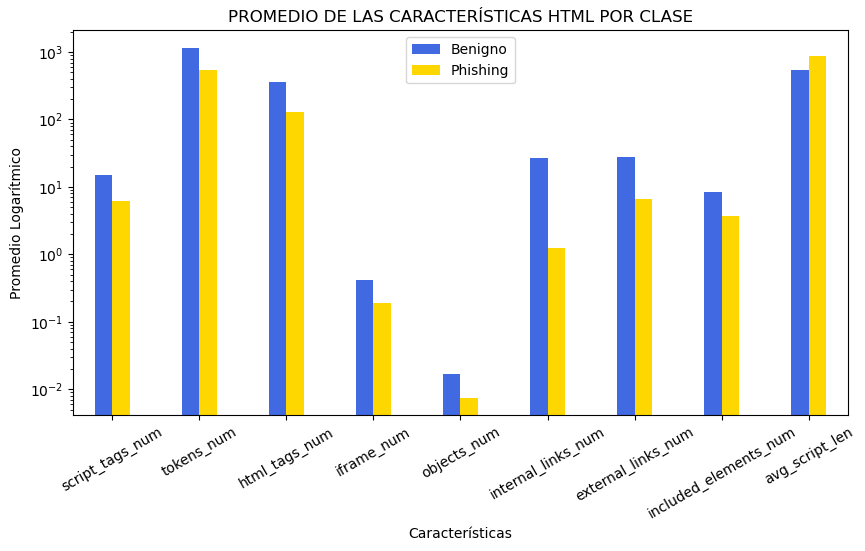

In [12]:
# plot features gain averages by class
relevant_webs_features[['Benigno', 'Phishing']].plot.bar(width=0.4, figsize=(10, 5), color=['royalblue', 'gold'])
plt.xlabel('Características')
plt.ylabel('Promedio Logarítmico')
plt.title('PROMEDIO DE LAS CARACTERÍSTICAS HTML POR CLASE')
plt.yscale('log')
plt.xticks(rotation=30)
plt.show() 

## **TEXT ANALYSIS**

Text preprocessing is a fundamental step in textual data analysis, which consists of cleaning and transforming unstructured text to prepare it for natural language processing (NLP) tasks. Some of the most common text preprocessing techniques are:

- Converting text to lowercase
- Removing punctuation marks
- Removing stop words
- Removing very frequent or very rare words
- Applying stemming or lemmatization of words

In [12]:
%load_ext Cython

In [13]:
%%cython
import re
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(text: str):
    """Preprocess text with regex and NLTK library"""
    text = re.sub(r'[^\w\s]', ' ', text) # remove punctuation signs and special chars
    text = re.sub(r' +', ' ', text) # remove unnecessary spaces
    text = text.lower() # put text in lower case
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)])
    return text.strip()

In [14]:
texts['text'] = texts['text'].parallel_map(preprocess_text)
texts

,text,label
0,6 1100 disc uniformitarianism 1086 sex lang di...,0
1,side galicismos galicismo spanish term name im...,0
2,equistar deal ticket still available assist ro...,0
3,hello hot lil horny toy one dream open mind pe...,1
4,software incredibly low price 86 low drapery s...,1
...,...,...
20132,nokia 7250i get win free auction take part sen...,1
20133,get ur 1st ringtone free reply msg tone gr8 to...,1
20134,ur cash balance currently 500 pound maximize u...,1
20135,record indicate involve accident last 2 5 year...,1


### TF-IDF Analysis

TF-IDF Vectorizer is a very common algorithm to transform text into a meaningful representation of numbers, which can be used for our text analysis. 

In [15]:
# vectorize texts
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.25, stop_words='english')
vect_matrix = vect.fit_transform(texts['text'])

**TF-IDF (term frequency-inverse document frequency)** is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents. The higher is the value, the more relevant the term is in that document. Hence, we'll check TF-IDF averages scores of all features extracted from TF-IDF Vectorizer and sort them in descending order, so we can know which are the most relevant words over all texts corpus.

In [16]:
# Get TF-IDF scores from all features
tfidfs = pd.DataFrame.sparse.from_spmatrix(vect_matrix, columns=vect.get_feature_names_out())

In [17]:
# Calculate TF-IDF Averages and sort them in descending order
tfidf_avgs = tfidfs.mean(axis=0).sort_values(ascending=False)[:20]
tfidf_avgs

list           0.010181
enron          0.010109
ect            0.008954
www            0.007807
mail           0.007708
linux          0.006962
http www       0.006893
email          0.006833
use            0.006571
free           0.006371
net            0.006361
time           0.006289
make           0.006224
new            0.006212
click          0.006084
message        0.006071
00             0.006008
language       0.005969
information    0.005788
know           0.005758
dtype: Sparse[float64, 0]

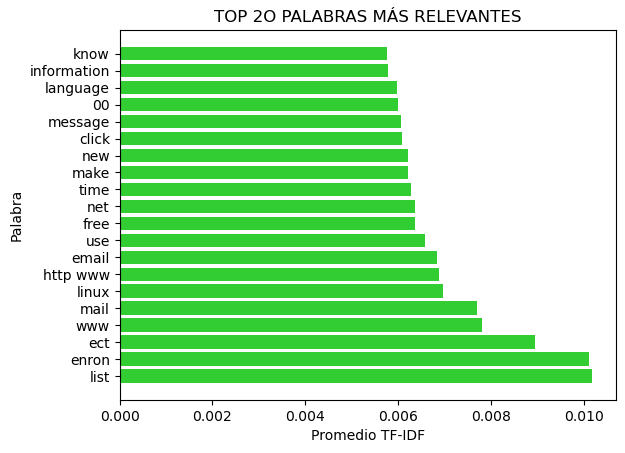

In [18]:
plt.barh(tfidf_avgs.index, tfidf_avgs.values, color='limegreen')
plt.xlabel("Promedio TF-IDF")
plt.ylabel("Palabra")
plt.title('TOP 2O PALABRAS MÁS RELEVANTES')
plt.show()

**IDF** is a measure of how common or rare a term is across the entire corpus of documents (texts samples). If the word is common and appears in many documents, the idf value (normalized) will approach 0 or else approach 1 if it’s rare. Hence, let's see which are the most common words across all texts samples using this measure.

In [19]:
feature_names = vect.get_feature_names_out()

In [20]:
idfs = vect.idf_ * (1/vect.idf_.max()) # normalize idfs vector between 0 to 1
lower_idfs_indexes = np.argsort(idfs)[:20]
most_common_words = [feature_names[i] for i in lower_idfs_indexes]
most_common_words_idfs = [idfs[i] for i in lower_idfs_indexes]

In [21]:
pd.Series(data=most_common_words_idfs, index=most_common_words)

mail           0.240285
time           0.242369
www            0.243095
use            0.243417
list           0.248152
make           0.249883
information    0.251177
new            0.251621
know           0.256461
http www       0.256707
like           0.257499
work           0.259227
email          0.261943
need           0.262360
subject        0.265112
message        0.268192
10             0.270603
want           0.283349
day            0.284389
include        0.284749
dtype: float64

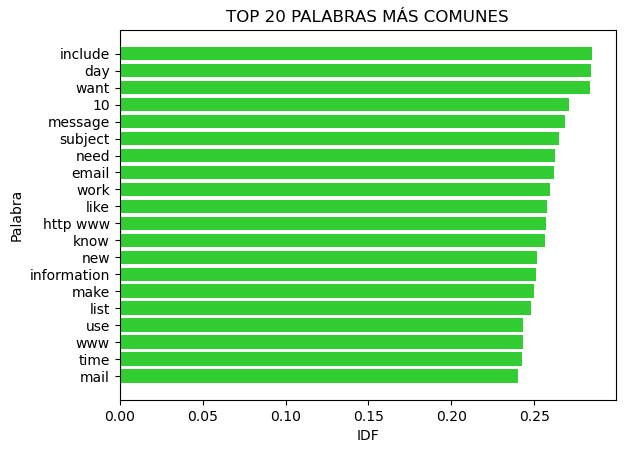

In [22]:
plt.barh(most_common_words, most_common_words_idfs, color='limegreen')
plt.xlabel("IDF")
plt.ylabel("Palabra")
plt.title('TOP 20 PALABRAS MÁS COMUNES')
plt.show()

In [23]:
benign_tf = pd.Series(' '.join(texts[texts['label'] == 0].text).split()).value_counts()
benign_tf = benign_tf[benign_tf.index.isin(tfidf_avgs.index.values)]
benign_tf.name = 'Benigno'

phishing_tf = pd.Series(' '.join(texts[texts['label'] == 1].text).split()).value_counts()
phishing_tf = phishing_tf[phishing_tf.index.isin(tfidf_avgs.index.values)]
phishing_tf.name = 'Phishing'

In [24]:
tf = pd.concat([benign_tf, phishing_tf], axis=1)
tf

,Benigno,Phishing
language,23700,93
enron,17840,3
mail,13206,5376
use,12264,2937
list,11119,3270
ect,10902,76
information,10816,3720
00,10772,3279
www,10486,3069
new,10277,3068


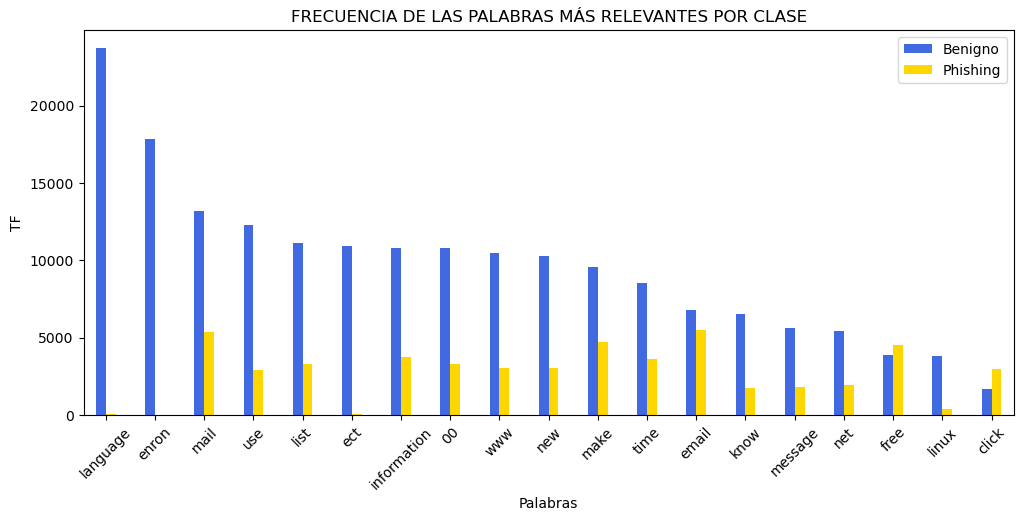

In [27]:
# plot features gain averages by class
tf[['Benigno', 'Phishing']].plot.bar(width=0.4, figsize=(12, 5), color=['royalblue', 'gold'])
plt.xlabel('Palabras')
plt.ylabel('TF')
plt.title('FRECUENCIA DE LAS PALABRAS MÁS RELEVANTES POR CLASE')
plt.xticks(rotation=45)
plt.show() 